# 1. 데이터 둘러보기.

## 칼럼 설명
: dacon에서 제공하는 데이터의 칼럼의 설명

* Date : 1981.05.01 ~ 2022.08.31 까지의 날짜
* Close : 종가 (종료 시 가격)
* Open : 시가 (시작 시 가격)
* High : 고가 (가장 높은 가격)
* Low : 저가 (가장 낮은 가격)
* Volume : 거래량 (매매된 주식의 수 (ex) 주)
* Change : 등락률 (전일대비 등락률, 일정한 기간에 어떠한 기준 값이 오르거나 내리는 비율 - 음수이면 전일대비 떨어진 것이고, 양수이면 전일대비 오른 것이다.)<br/>
(cf) 등락률 = (현재 종가 - 전일 종가) / 전일 종가, 전월비(%) = 등락률 x 100

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kospi_data.csv")
df.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [3]:
df_copy=df.copy()
df_copy.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [4]:
df_copy.dtypes

Date       object
Close     float64
Open      float64
High      float64
Low       float64
Volume    float64
Change    float64
dtype: object

In [5]:
df_copy.isnull().sum() # 결측치는 없습니다.

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [6]:
df_copy.shape

(11024, 7)

In [7]:
df_copy.describe()

,Close,Open,High,Low,Volume,Change
count,11024.000000,11024.000000,11024.000000,11024.000000,1.102400e+04,11024.000000
mean,1121.077967,1121.552291,1127.448217,1114.365044,2.556932e+08,0.000379
std,772.891667,773.393378,777.129136,768.310046,2.938432e+08,0.014550
min,105.990000,105.990000,105.990000,105.990000,1.660000e+05,-0.120200
25%,586.562500,586.482500,589.730000,582.837500,1.208750e+07,-0.006300
50%,878.105000,878.015000,882.360000,873.430000,2.264900e+08,0.000300
75%,1891.347500,1892.090000,1902.320000,1880.635000,4.028000e+08,0.007200
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.119500


In [8]:
df_copy.describe(include="object")

,Date
count,11024
unique,11024
top,1981-05-01
freq,1


### 범주형 변수 vs 수치형 변수

* [범주형 변수] : Date - 범주를 나눠서 그래프를 그릴 수 있습니다.
* [수치형 변수] : Close, Open, High, Low, Volumn, Change - 통계적 수치를 이용하여 그래프를 그릴 수 있습니다.

In [9]:
print("데이터의 개수는 {} 개 입니다.".format(df_copy.shape[0]*df_copy.shape[1]))
print("데이터의 결측치의 개수는 {} 개 입니다.".format(df_copy.isnull().sum().sum()))

데이터의 개수는 77168 개 입니다.
데이터의 결측치의 개수는 0 개 입니다.


# 2. 데이터 정비하기.

## 2-1. 칼럼 모두 소문자로 변경하기.

칼럼을 모두 소문자로 통일하는 것이 데이터 분석 시에 더 편리합니다.

In [10]:
df_copy.columns=df_copy.columns.str.lower()
df_copy.columns

Index(['date', 'close', 'open', 'high', 'low', 'volume', 'change'], dtype='object')

In [11]:
df_copy.head()

,date,close,open,high,low,volume,change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


## 2-2. 전월비 칼럼 생성하기.

In [12]:
df_copy["monthly ratio"]=df_copy["change"]*100
df_copy.head()

,date,close,open,high,low,volume,change,monthly ratio
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16


# 2-3. date 칼럼을 datetime 으로 변경해주기.

In [13]:
df_copy["date"]=pd.to_datetime(df_copy["date"])

In [14]:
df_copy.dtypes

date             datetime64[ns]
close                   float64
open                    float64
high                    float64
low                     float64
volume                  float64
change                  float64
monthly ratio           float64
dtype: object

## 2-4. date 칼럼을 연도, 월, 일, 요일로 쪼개주기.

In [15]:
df_copy["year"]=df_copy["date"].dt.year
df_copy["month"]=df_copy["date"].dt.month
df_copy["day"]=df_copy["date"].dt.day
df_copy["dayofweek"]=df_copy["date"].dt.day_name()

In [16]:
df_copy.head()

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday


# 3. EDA & Visualization

In [17]:
import os

In [18]:
sns.set_style("darkgrid")
plt.rcParams["axes.unicode_minus"]=False

In [19]:
if os.name=="nt":
    plt.rcParams["font.family"]="Malgun Gothic"

In [20]:
df_copy.head()

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday


In [21]:
df_copy["year"].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [22]:
df_max=df_copy.groupby(["year", "month"])["volume"].max().reset_index()
df_max

,year,month,volume
0,1981,5,3.330000e+06
1,1981,6,4.160000e+06
2,1981,7,3.010000e+06
3,1981,8,1.670000e+06
4,1981,9,1.240000e+06
...,...,...,...
491,2022,4,1.740000e+09
492,2022,5,1.330000e+09
493,2022,6,8.148800e+08
494,2022,7,5.303400e+08


In [23]:
df_min=df_copy.groupby(["year", "month"])["volume"].min().reset_index()
df_min

,year,month,volume
0,1981,5,543000.0
1,1981,6,1170000.0
2,1981,7,485000.0
3,1981,8,230000.0
4,1981,9,308000.0
...,...,...,...
491,2022,4,962400.0
492,2022,5,469800000.0
493,2022,6,422130000.0
494,2022,7,295620000.0


In [24]:
df_max.sort_values(by=["year", "month"])

,year,month,volume
0,1981,5,3.330000e+06
1,1981,6,4.160000e+06
2,1981,7,3.010000e+06
3,1981,8,1.670000e+06
4,1981,9,1.240000e+06
...,...,...,...
491,2022,4,1.740000e+09
492,2022,5,1.330000e+09
493,2022,6,8.148800e+08
494,2022,7,5.303400e+08


In [25]:
df_min.sort_values(by=["year", "month"])

,year,month,volume
0,1981,5,543000.0
1,1981,6,1170000.0
2,1981,7,485000.0
3,1981,8,230000.0
4,1981,9,308000.0
...,...,...,...
491,2022,4,962400.0
492,2022,5,469800000.0
493,2022,6,422130000.0
494,2022,7,295620000.0


In [26]:
list(np.arange(df_copy["year"].unique()[0], df_copy["year"].unique()[-1]+1))

[1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [27]:
list(np.arange(1, df_copy["month"].nunique()+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

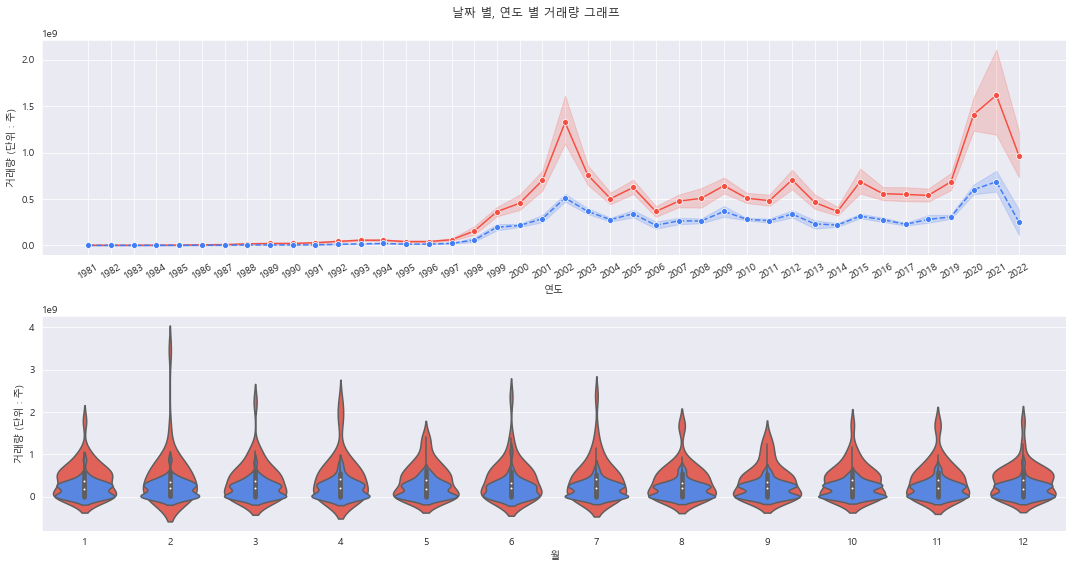

In [28]:
fig, ax=plt.subplots(2, 1, figsize=(15,8))

_=sns.lineplot(data=df_max, x="year", y="volume", ax=ax[0], marker="o", color="#F64F42")
_=sns.violinplot(data=df_max, x="month", y="volume", ax=ax[1], color="#F64F42")
_=sns.lineplot(data=df_min.reset_index(), x="year", y="volume", ax=ax[0], marker="o", linestyle="--", color="#437EF6")
_=sns.violinplot(data=df_min, x="month", y="volume", ax=ax[1], color="#437EF6")

_=ax[0].set_xlabel("연도")
_=ax[0].set_ylabel("거래량 (단위 : 주)")
_=ax[1].set_xlabel("월")
_=ax[1].set_ylabel("거래량 (단위 : 주)")

_=ax[1].set_xticklabels(list(np.arange(1, df_copy["month"].nunique()+1)))
_=ax[0].set_xticks(list(np.arange(df_copy["year"].unique()[0], df_copy["year"].unique()[-1]+1)))
_=ax[0].set_xticklabels(list(np.arange(df_copy["year"].unique()[0], df_copy["year"].unique()[-1]+1)), rotation=30)
# set_xticklabels(xlabels, rotation) 적어주기.

_=plt.suptitle("날짜 별, 연도 별 거래량 그래프")
_=plt.tight_layout()
plt.savefig("images/날짜 별, 연도 별 거래량 그래프.png", dpi=200, facecolor="white")

거래량이 가장 많은 달은 거래량 분포 범위가 4*e^9 주까지도 분포합니다. 대부분 거래량 분포 범위가 2*e^9 주 언저리까지 분포합니다. 그리고 0 주 ~ e^9 주 사이에 가장 많이 분포되어 있음을 알 수 있습니다. 거래량이 가장 적은 달은 0 주 근처에 가장 많이 분포되어 있음을 알 수 있습니다. 그리고 거래량이 가장 많을 때와는 거래량 분포 범위도 많이 차이가 남을 알 수 있습니다.

연도 별로 확인해보면, 1981년 ~ 1997년 까지는 연도 별 최대 거래량과 최소 거래량이 비슷함을 알 수 있습니다. 하지만 1998년부터 차이가 나기 시작하였고, 2002년과 2021년에 가장 차이가 크게 나타났습니다.

In [29]:
df_copy.sort_values(by="date").head()

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday


In [30]:
df_copy.sort_values(by="volume", ascending=False).head(10)

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
10644,2021-02-19,3107.62,3089.96,3109.67,3040.28,3.460000e+09,0.0068,0.68,2021,2,19,Friday
6048,2002-07-23,743.52,715.81,743.52,709.37,2.380000e+09,0.0314,3.14,2002,7,23,Tuesday
10646,2021-02-23,3070.09,3069.26,3094.29,3035.46,2.360000e+09,-0.0031,-0.31,2021,2,23,Tuesday
10724,2021-06-16,3278.68,3259.06,3281.96,3256.68,2.350000e+09,0.0062,0.62,2021,6,16,Wednesday
10688,2021-04-23,3186.10,3173.47,3188.70,3146.54,2.250000e+09,0.0027,0.27,2021,4,23,Friday
10651,2021-03-03,3082.99,3041.20,3083.04,3029.37,2.240000e+09,0.0129,1.29,2021,3,3,Wednesday
10639,2021-02-10,3100.58,3088.13,3111.88,3064.25,2.150000e+09,0.0052,0.52,2021,2,10,Wednesday
6046,2002-07-19,754.62,759.41,761.68,744.36,2.150000e+09,-0.0248,-2.48,2002,7,19,Friday
10638,2021-02-09,3084.67,3102.25,3129.66,3084.67,2.150000e+09,-0.0021,-0.21,2021,2,9,Tuesday
6044,2002-07-16,771.45,785.28,792.61,767.87,1.980000e+09,-0.0154,-1.54,2002,7,16,Tuesday


거래량이 많은 순서대로 상위 10개를 살펴보니, 2021년과 2002년이 많았습니다. 2021년과 2002년에 어떤 일이 일어났었는지 알아봐야 합니다.

In [31]:
change_positive=df_copy.loc[df_copy["change"]>=0] # 등락률이 양수인 경우
change_positive

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday
6,1981-05-09,118.80,118.80,118.80,118.80,598000.0,0.0008,0.08,1981,5,9,Saturday
7,1981-05-12,118.80,118.80,118.80,118.80,543000.0,0.0000,0.00,1981,5,12,Tuesday
8,1981-05-13,119.90,119.90,119.90,119.90,858000.0,0.0093,0.93,1981,5,13,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
11018,2022-08-24,2447.45,2446.18,2454.01,2430.69,423500000.0,0.0050,0.50,2022,8,24,Wednesday
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1.22,2022,8,25,Thursday
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.15,2022,8,26,Friday
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,0.99,2022,8,30,Tuesday


In [32]:
df1=change_positive.groupby(["date"])["change"].mean().reset_index()
df1

,date,change
0,1981-05-01,0.0098
1,1981-05-06,0.0008
2,1981-05-09,0.0008
3,1981-05-12,0.0000
4,1981-05-13,0.0093
...,...,...
5721,2022-08-24,0.0050
5722,2022-08-25,0.0122
5723,2022-08-26,0.0015
5724,2022-08-30,0.0099


In [33]:
change_negative=df_copy.loc[df_copy["change"]<0] # 등략률이 음수인 경우
change_negative

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday
5,1981-05-08,118.70,118.70,118.70,118.70,1090000.0,-0.0050,-0.50,1981,5,8,Friday
10,1981-05-15,121.40,121.40,121.40,121.40,1550000.0,-0.0008,-0.08,1981,5,15,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
11014,2022-08-18,2508.05,2499.30,2515.37,2488.09,381630000.0,-0.0033,-0.33,2022,8,18,Thursday
11015,2022-08-19,2492.69,2510.72,2510.72,2492.69,459830000.0,-0.0061,-0.61,2022,8,19,Friday
11016,2022-08-22,2462.50,2467.38,2475.77,2457.08,422550000.0,-0.0121,-1.21,2022,8,22,Monday
11017,2022-08-23,2435.34,2449.31,2454.55,2431.83,471170000.0,-0.0110,-1.10,2022,8,23,Tuesday


In [34]:
df2=change_negative.groupby(["date"])["change"].mean().reset_index()
df2

,date,change
0,1981-05-02,-0.0008
1,1981-05-04,-0.0235
2,1981-05-07,-0.0116
3,1981-05-08,-0.0050
4,1981-05-15,-0.0008
...,...,...
5293,2022-08-18,-0.0033
5294,2022-08-19,-0.0061
5295,2022-08-22,-0.0121
5296,2022-08-23,-0.0110


In [35]:
df_copy.shape

(11024, 12)

In [36]:
print(change_positive.shape)
print(change_negative.shape)

(5726, 12)
(5298, 12)


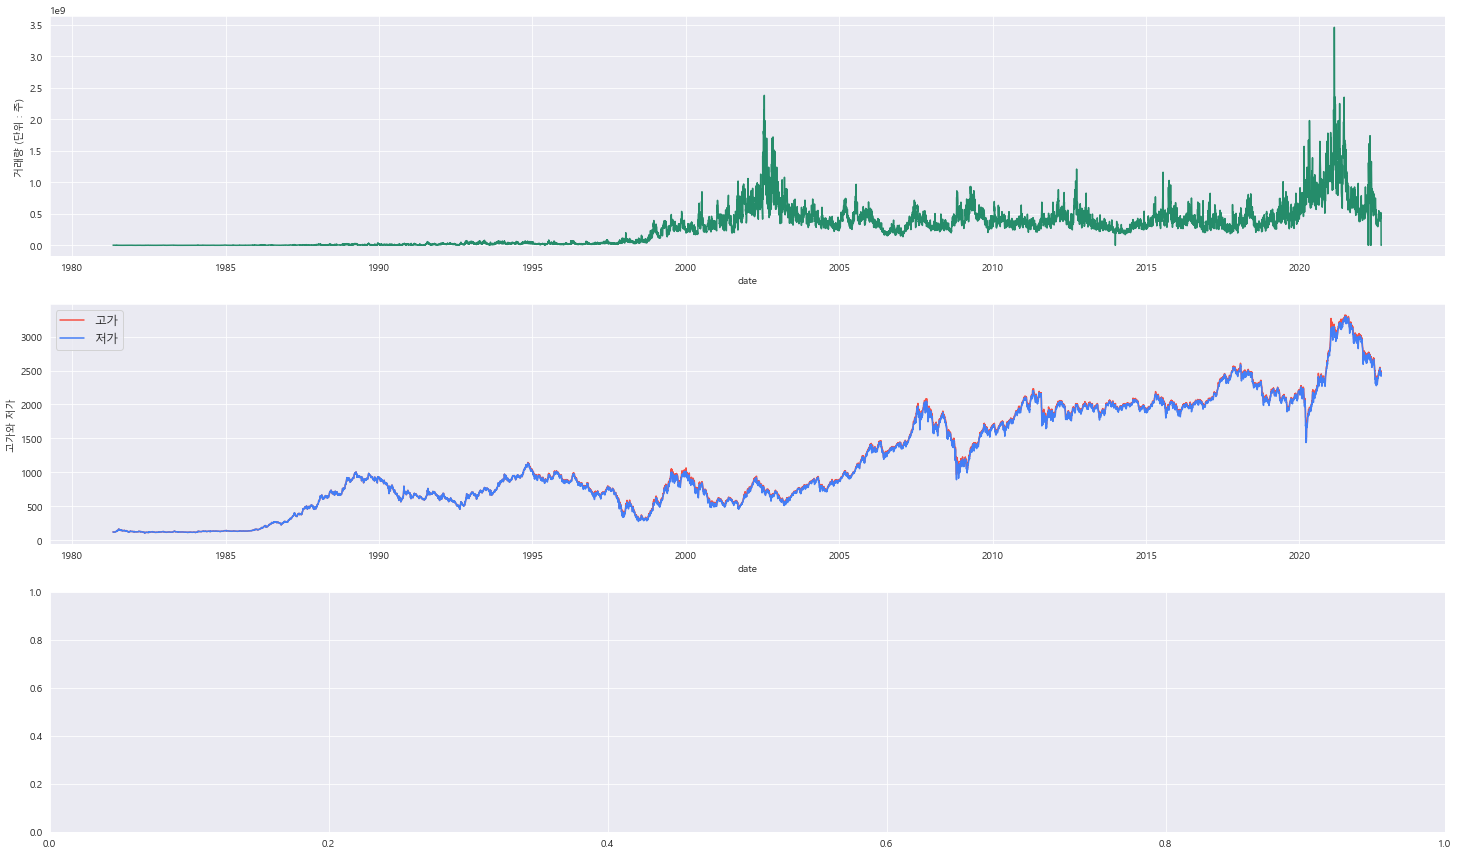

In [38]:
fig, ax=plt.subplots(3,1, figsize=(25, 15))

_=sns.lineplot(data=df_copy, x="date", y="volume", ax=ax[0], color="#258C6A")
_=sns.lineplot(data=df_copy, x="date", y="high", ax=ax[1], color="#F64F42", label="고가")
_=sns.lineplot(data=df_copy, x="date", y="low", ax=ax[1], color="#437EF6", label="저가")

_=ax[0].set_ylabel("거래량 (단위 : 주)")
_=ax[1].set_ylabel("고가와 저가")
_=ax[1].legend(loc="upper left", fontsize=12)

In [53]:
corr=df_copy.corr() # 상관계수 구하기.
corr

,close,open,high,low,volume,change,monthly ratio,year,month,day
close,1.000000,0.999869,0.999926,0.999937,0.639874,-0.001428,-0.001428,0.923641,-0.009398,0.002872
open,0.999869,1.000000,0.999946,0.999917,0.639808,-0.011343,-0.011343,0.923601,-0.009369,0.003113
high,0.999926,0.999946,1.000000,0.999886,0.641940,-0.007324,-0.007324,0.924667,-0.009486,0.003011
low,0.999937,0.999917,0.999886,1.000000,0.637524,-0.005705,-0.005705,0.922444,-0.009282,0.002951
volume,0.639874,0.639808,0.641940,0.637524,1.000000,0.016387,0.016387,0.729982,-0.022247,-0.000711
change,-0.001428,-0.011343,-0.007324,-0.005705,0.016387,1.000000,1.000000,-0.008261,0.001935,-0.013635
monthly ratio,-0.001428,-0.011343,-0.007324,-0.005705,0.016387,1.000000,1.000000,-0.008261,0.001935,-0.013635
year,0.923641,0.923601,0.924667,0.922444,0.729982,-0.008261,-0.008261,1.000000,-0.026507,0.003625
month,-0.009398,-0.009369,-0.009486,-0.009282,-0.022247,0.001935,0.001935,-0.026507,1.000000,-0.029333
day,0.002872,0.003113,0.003011,0.002951,-0.000711,-0.013635,-0.013635,0.003625,-0.029333,1.000000


In [54]:
mask=np.zeros_like(corr)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [57]:
mask[np.triu_indices_from(mask)]=True # 상부 삼각형에 대한 인덱스를 반환해줍니다.

In [59]:
mask # 대각선 위의 부분을 모두 1로 만들어줄 수 있습니다.

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

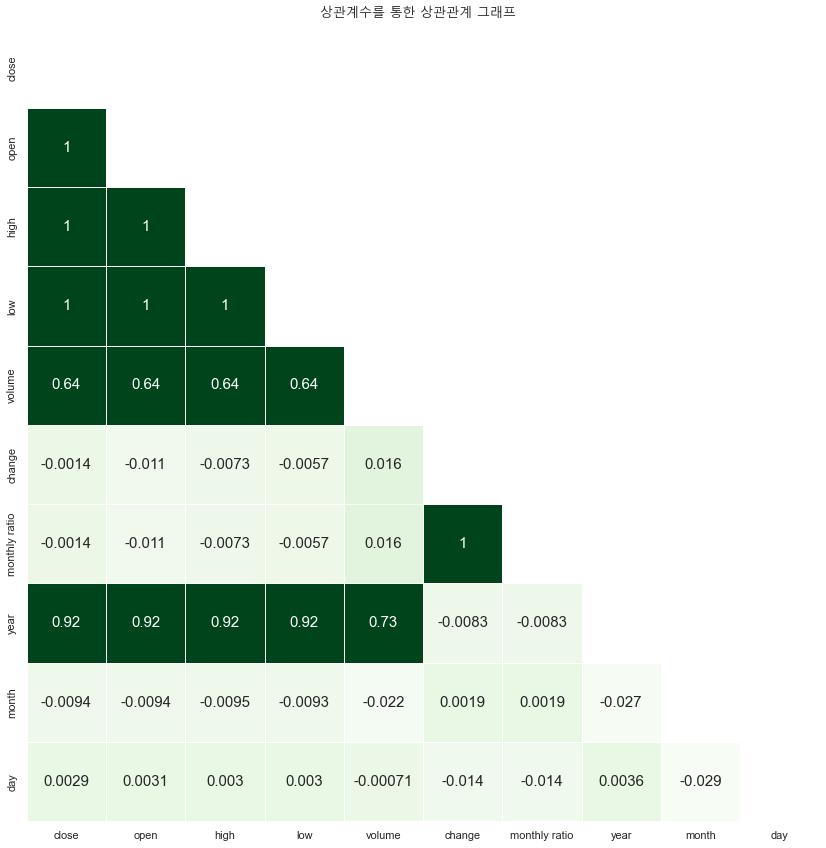

In [127]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5, annot=True, 
                     annot_kws={"size":15}, cmap="Greens", cbar=False)
    
_=plt.suptitle("상관계수를 통한 상관관계 그래프", fontsize=13)
plt.tight_layout()
plt.savefig("images/상관계수를 통한 상관관계 그래프.png", dpi=200, facecolor="white")

1. 완벽한 정비례 관계 & 연관성이 큼 : 자기 자신과의 관계가 1이기 때문에, 상관계수가 1이면 완벽한 정비례 관계를 의미합니다.

* close ~ open 
* close ~ high
* close ~ low
* open ~ high
* open ~ low
* high ~ low
* change ~ monthly ratio

2. 정비례 관계 : 상관계수가 양수이기 때문에, 연관성이 꽤 있는 편입니다.

* volume ~ close
* volume ~ open
* volume ~ high
* volume ~ low
* year ~ close
* year ~ open
* year ~ high
* year ~ low
* year ~ volume

3. 반비례 관계 : 상관계수가 음수이기 때문에, 연관성이 꽤 약한 편입니다.

* year ~ close
* year ~ open
* year ~ high
* year ~ low

In [128]:
df_copy.head()

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday
